# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## 1. Business/Project Understanding

- Explain project's background and requirement.

Latar belakang project ini adalah lembaga HELP Internasional berhasil mengumpulkan uang $10 juta dan perlu keputusan dalam menggunakan uangnya untuk membantu negara yang membutuhkan. Tugas kita sebagai seorang data scientist adalah untuk mengkategorikan negara dengan faktor sosial ekonomi dan kesehatan untuk menentukan perkembangan negara secara umum dan menyarankan negara negara yang perlu jadi fokus dari bantuan ini.

Requirement :
Dataset 'Data_Negara_HELP' dengan fitur :

Negara : Nama negara
Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
Ekspor : Ekspor barang dan jasa perkapita
Kesehatan: Total pengeluaran kesehatan perkapita
Impor: Impor barang dan jasa perkapita
Pendapatan: Penghasilan bersih perorang
Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi 



## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.


### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    
### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    
### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

2.1 

Dataset memiliki 10 kolom untuk dijadikan fitur :
Negara : Nama negara
Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
Ekspor : Ekspor barang dan jasa perkapita
Kesehatan: Total pengeluaran kesehatan perkapita
Impor: Impor barang dan jasa perkapita
Pendapatan: Penghasilan bersih perorang
Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi

Jumlah Row : 167 Rows

2.2 EDA Part 1

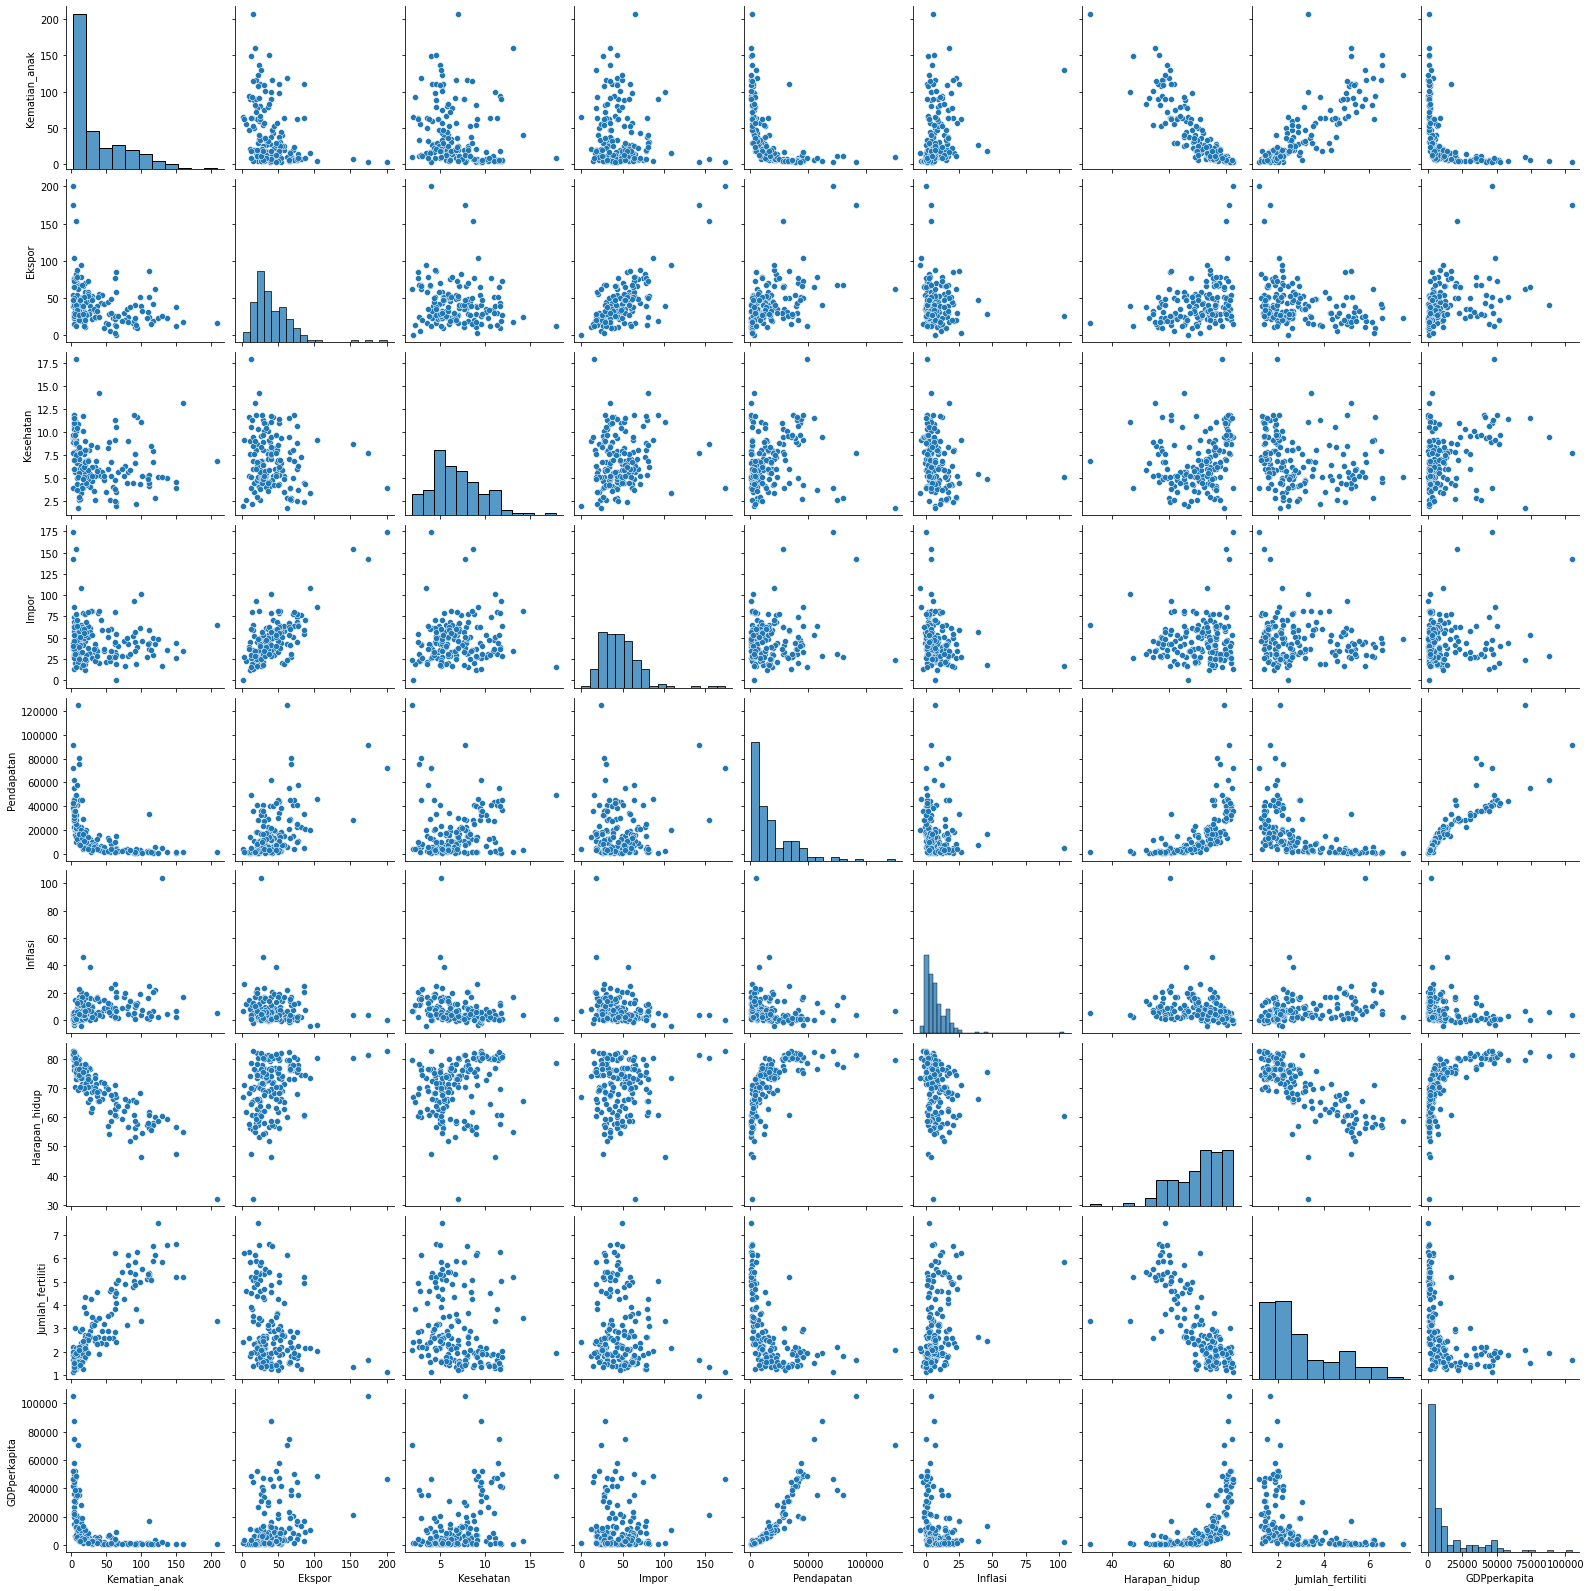

In [90]:
sns.pairplot(data=df)
plt.show()

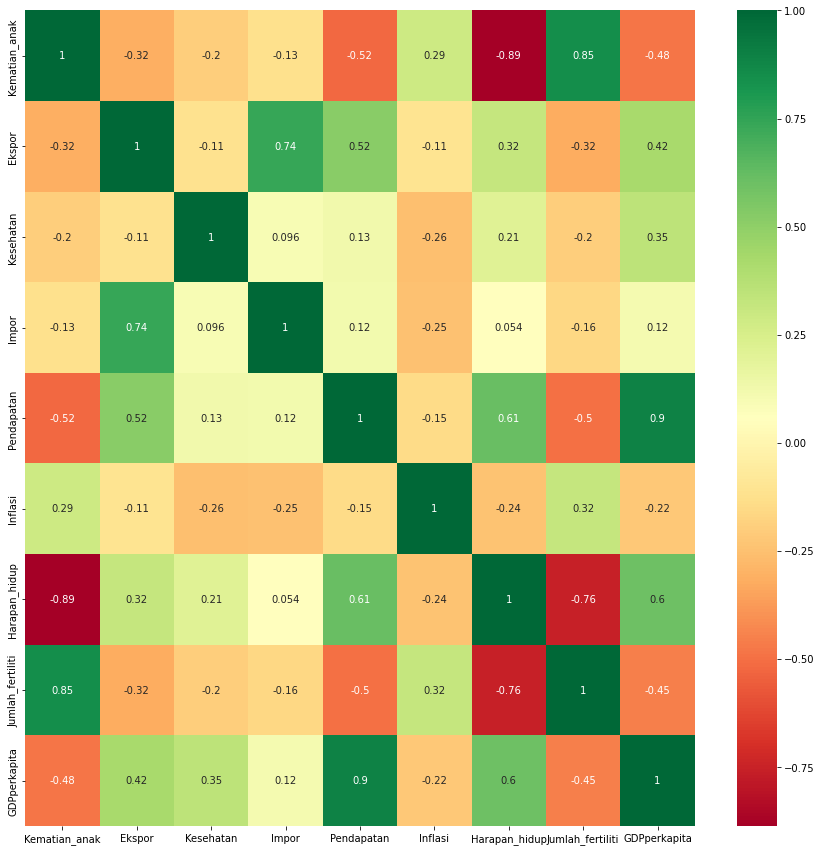

In [94]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig.savefig('heatmap.png')

2.3 Feature Selection

2 Fitur yang digunakan untuk analisis dan clustering : harapan_hidup dan Pendapatan
Alasannya :
-Pertama, 2 kolom tersebut memiliki koefisien korelasi yang cukup tinggi (0.61), artinya kedua kolom tersebut memiliki hubungan yang cukup kuat.
-Kedua, 2 kolom tersebut berasal dari kategori yang berbeda, harapan_hidup = kesehatan, Pendapatan = sosial ekonomi.
-Ketiga, secara logika dan fakta pun kedua kolom tersebut jelas memiliki hubungan yang erat, contohnya ketika "Pendapatan" seseorang cukup tinggi maka ia memiliki akses lebih ke fasilitas kesehatan dan makan yang layak, yang mana "harapan_hidup" nya menjadi semakin tinggi dan hal sebaliknya pun berlaku.

2.4 Data Cleaning
Handling Missing Value

In [20]:
df['Harapan_hidup'].unique()
df['Pendapatan'].unique()
df.describe()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Tidak ada missing value

Handling Outlier


<AxesSubplot:>

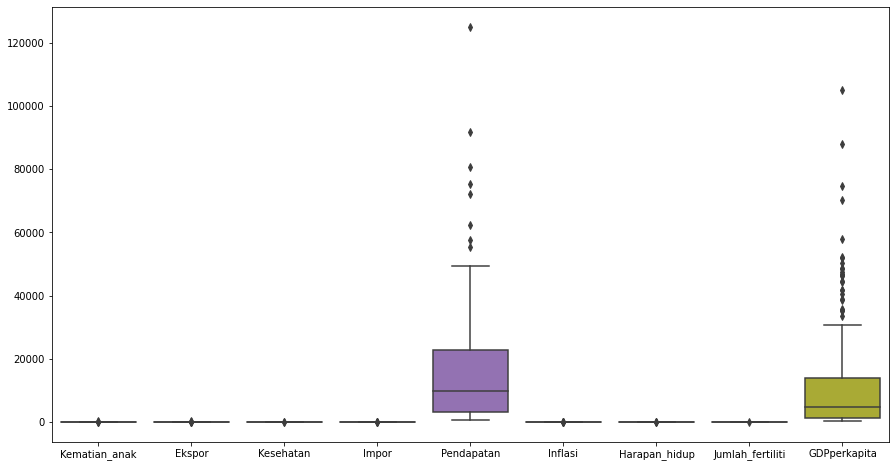

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)

<AxesSubplot:xlabel='Pendapatan'>

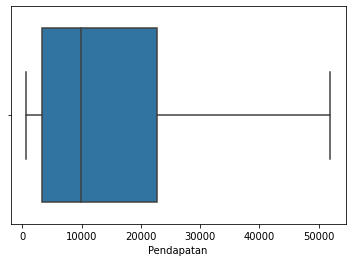

In [39]:
q1 = df['Pendapatan'].quantile(0.25)
q3 = df['Pendapatan'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

df_baru = df.copy()
df_baru['Pendapatan'] = np.where(
    df_baru['Pendapatan'] > upper_bound,
    upper_bound,
    np.where(
        df_baru['Pendapatan'] < lower_bound,
        lower_bound,
        df_baru['Pendapatan']
    )
)

sns.boxplot(x='Pendapatan', data=df_baru)


Handling outlier menggunakan metode capping, yakni membatasi data outlier  dan membuat batas yaitu, di atas nilai tertentu atau kurang dari nilai itu, semua nilai akan dianggap sebagai outlier, dan jumlah outlier dalam dataset memberikan nomor capping itu.
Alasannya karena teknik ini cocok untuk yang berhubungan dengan pendapatan. Pada fitur pendapatan ditemukan bahwa orang-orang di atas tingkat pendapatan tertentu berperilaku dengan cara yang sama seperti mereka yang berpenghasilan lebih rendah. Dalam hal ini, Anda dapat membatasi nilai pendapatan pada tingkat yang membuatnya tetap utuh dan dengan demikian memperlakukan outlier. Selain itu, outliernya pun sedikit sehongga cocok di capping



2.5 EDA part 2
Univariate Analysis

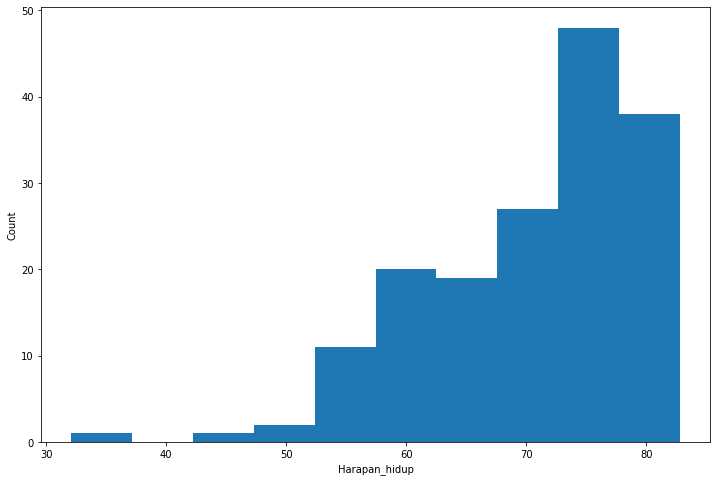

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(df_baru['Harapan_hidup'])
ax.set_xlabel('Harapan_hidup')
ax.set_ylabel('Count')
plt.show()

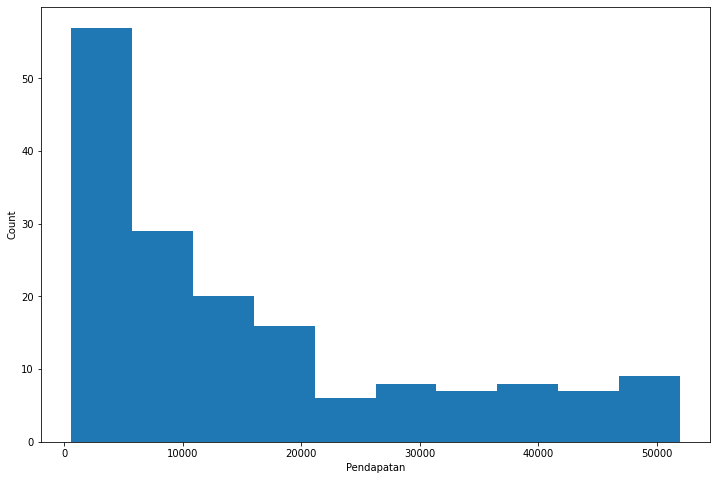

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(df_baru['Pendapatan'])
ax.set_xlabel('Pendapatan')
ax.set_ylabel('Count')
plt.show()

Bivariate Analysis

<AxesSubplot:xlabel='Pendapatan', ylabel='Harapan_hidup'>

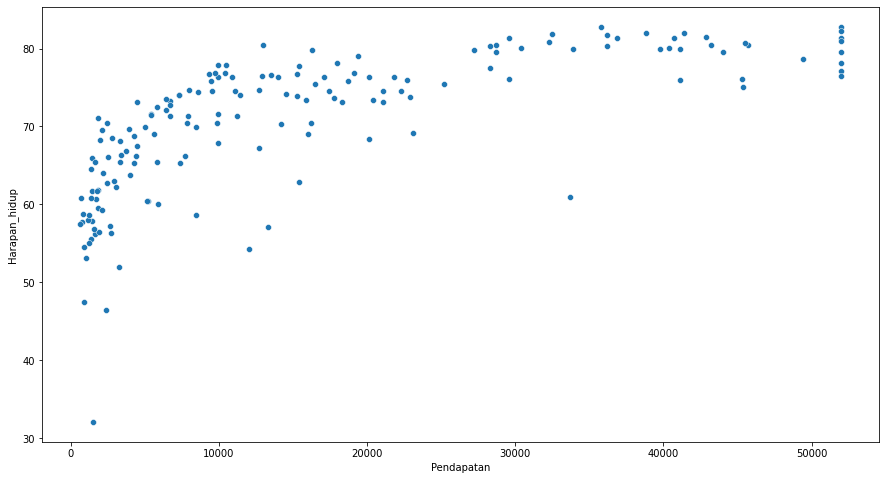

In [48]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Pendapatan', y='Harapan_hidup', data=df_baru)

Univariate Analysis :
Pada grafik dapat dilihat persebaran data dari kedua kolom dan jumlahnya

Bivariate Analysis :
Pada grafik dapat dilihat relasi antar 2 variabel, dimana semakin besar pendapatan maka semakin besar pula harapan hidupnya.

## 3. Clustering
1. Scale the Data
<br><br>
2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

n_cluster = 2


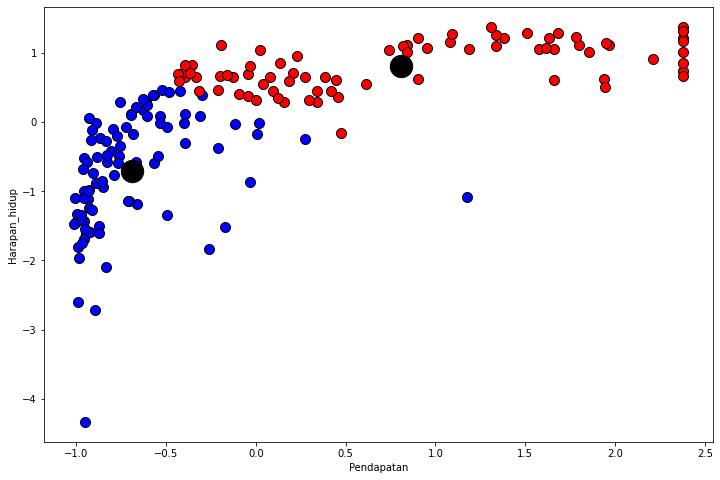

In [59]:
# feature scaling
df_cluster_feature = df_baru[['Pendapatan', 'Harapan_hidup']]
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_cluster_feature.astype(float))

# Clustering KMeans
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['Pendapatan', 'Harapan_hidup'])
new_dfoutlier_std['label_kmeans1'] = labels1

print('n_cluster = 2')

plt.figure(figsize=(12, 8))
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', edgecolor='black', s=100)
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans1 == 1], c='red', edgecolor='black', s=100)

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan_hidup')
plt.show()

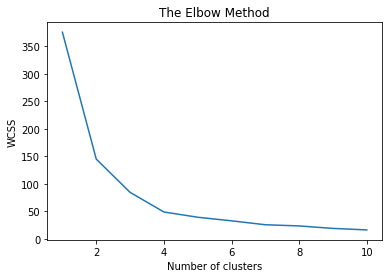

In [61]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

n_cluster = 4


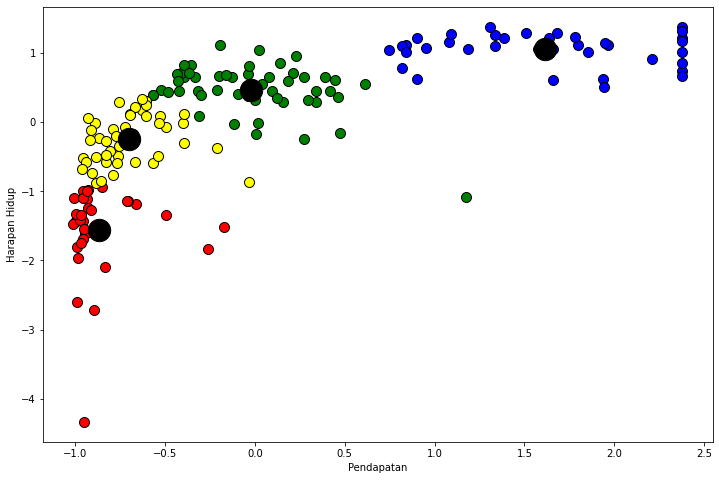

In [64]:
kmeans2 = KMeans(n_clusters=4, random_state=42).fit(dfoutlier_std)
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

print('n_cluster = 4')

plt.figure(figsize=(12, 8))
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans2 == 0], c='green', edgecolor='black', s=100)
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans2 == 1], c='red', edgecolor='black', s=100)
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans2 == 2], c='blue', edgecolor='black', s=100)
plt.scatter(new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans2 == 3], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans2 == 3], c='yellow', edgecolor='black', s=100)

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('Pendapatan')
plt.ylabel('Harapan Hidup')
plt.show()

In [79]:
new_dfoutlier_std['Pendapatan'][new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Harapan_hidup'][new_dfoutlier_std.label_kmeans2 == 1]

(0     -0.943936
 3     -0.660984
 17    -0.930085
 21    -0.172909
 25    -0.955808
 26    -0.999735
 28    -0.874682
 31    -0.991556
 32    -0.922830
 37    -1.009958
 38    -0.707813
 40    -0.872703
 50    -0.956467
 59    -0.848299
 63    -0.971637
 64    -0.958446
 66    -0.951191
 81    -0.936021
 87    -0.893150
 88    -1.003956
 93    -0.958446
 94    -0.982190
 97    -0.926787
 106   -0.989577
 108   -0.492136
 112   -0.996437
 113   -0.710451
 132   -0.969659
 136   -0.932723
 137   -0.258652
 147   -0.912277
 150   -0.970318
 155   -0.948553
 166   -0.833789
 Name: Pendapatan, dtype: float64,
 0     -1.619092
 3     -1.179234
 17    -0.987502
 21    -1.517586
 25    -1.427359
 26    -1.449916
 28    -1.495030
 31    -2.600313
 32    -1.585257
 37    -1.472473
 38    -1.145399
 40    -1.607814
 50    -0.998780
 59    -0.942388
 63    -1.416081
 64    -1.686762
 66    -4.337186
 81    -1.111564
 87    -2.713097
 88    -1.100286
 93    -1.100286
 94    -1.968722
 97    -1.246

In [86]:
df.iloc[31]

Negara              Central African Republic
Kematian_anak                          149.0
Ekspor                                  11.8
Kesehatan                               3.98
Impor                                   26.5
Pendapatan                               888
Inflasi                                 2.01
Harapan_hidup                           47.5
Jumlah_fertiliti                        5.21
GDPperkapita                             446
Name: 31, dtype: object

In [83]:
df.iloc[66]

Negara              Haiti
Kematian_anak       208.0
Ekspor               15.3
Kesehatan            6.91
Impor                64.7
Pendapatan           1500
Inflasi              5.45
Harapan_hidup        32.1
Jumlah_fertiliti     3.33
GDPperkapita          662
Name: 66, dtype: object

In [87]:
df.iloc[87]

Negara              Lesotho
Kematian_anak          99.7
Ekspor                 39.4
Kesehatan              11.1
Impor                 101.0
Pendapatan             2380
Inflasi                4.15
Harapan_hidup          46.5
Jumlah_fertiliti        3.3
GDPperkapita           1170
Name: 87, dtype: object

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

4. 

Country cluser yang difokuskan adalah cluster merah

Daftar Countries di cluster : ga ngerti caranya dan mepet deadline kerjanya jadi manual aja satu satu wkwkwk

Rekomendasi Countries yang dipilih : Haiti, Central African Republic, Lesotho

Alasannya adalah berdasarkan hasil clustering dari 2 kolom yang dipilih, Haiti, Central African Republic, dan Lesotho adalah 3 negara yang terburuk nilainya. Karena dari segi pendapatan dan harapan hidup yang rendah, maka diputuskan untuk dipilih Haiti, Central African Republic, dan Lesotho untuk diberi bantuan sebesar USD 10 Mil atas hasil analisis ini

## 5. Deliverables

1. What:
    - PDF file of the report presentation slide.
    - Notebook (.ipynb) file
<br><br>
2. How:
    - Pack them into compressed archive file (.zip/.rar).
    - Upload them to google drive.
    - Submit the link to sanbercode web.